In [21]:
#Code for figure 3, 8, 9 (run blocks depending on the comments that specify for which figure it is)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import io
import scipy.io as sio
import pandas as pd
import os

In [22]:
#Write the path to the txt folder to be analysed
folderpath= input("Simulation folder path?")

Simulation folder path?./COPASI_simulations/Li_2012_modelling/prolonged_phosphorylation_test/scan_dephosphorylation_constant.txt


In [23]:
#Downloads the data from COPASI, into a table
df = pd.read_csv(folderpath, sep='\s+', index_col = False)

print(df.columns)

df

Index(['Values[kcat_CaMKIIp_PP1a].InitialValue', 'Values[AMPAR_bar]',
       'Values[CaMKII_active_ratio]', 'Values[CaMKII_active_total]',
       'Values[CamR_ratio]', 'Values[Dp_bar]',
       'Values[k_AMPAR_phsophorylation]', 'Values[k_AMPARp_dephosphorylation]',
       'Values[CamT_total]', 'Values[PKA_bar]', 'Values[PP1a_bar]',
       'Values[PP1a_total]', 'Values[PP2B_bar]', '[AMPAR]', '[AMPAR_P]',
       '[CaMKII]', '[CaMKIIp]', '[CaMKIIp_PP1a]', '[Ca]', '[Dp]', '[PKA]',
       '[PP1a]', '[PP1a_Dp]', '[PP2B]', '[PP2Bi]', 'Time'],
      dtype='object')


,Values[kcat_CaMKIIp_PP1a].InitialValue,Values[AMPAR_bar],Values[CaMKII_active_ratio],Values[CaMKII_active_total],Values[CamR_ratio],Values[Dp_bar],Values[k_AMPAR_phsophorylation],Values[k_AMPARp_dephosphorylation],Values[CamT_total],Values[PKA_bar],...,[CaMKIIp],[CaMKIIp_PP1a],[Ca],[Dp],[PKA],[PP1a],[PP1a_Dp],[PP2B],[PP2Bi],Time
0,0.0,0.100000,0.000000,0.000000e+00,0.000048,0.000000e+00,0.000000,0.461668,0.000030,0.01,...,0.000000e+00,0.000000e+00,1.000000e-08,0.000000e+00,1.200000e-08,2.000000e-06,0.000000e+00,0.000000e+00,6.000000e-06,0.000
1,0.0,0.099954,0.000005,3.251020e-10,0.000059,8.980870e-08,0.000002,0.461685,0.000030,0.01,...,0.000000e+00,0.000000e+00,8.641440e-10,2.687070e-13,1.180140e-08,2.000000e-06,7.186880e-16,1.670970e-26,5.999900e-06,0.001
2,0.0,0.099908,0.000009,6.502990e-10,0.000070,3.556450e-07,0.000004,0.461701,0.000030,0.01,...,0.000000e+00,0.000000e+00,1.175170e-09,1.061240e-12,1.160880e-08,2.000000e-06,5.694420e-15,4.489230e-25,5.999780e-06,0.002
3,0.0,0.099862,0.000014,9.756580e-10,0.000081,7.922420e-07,0.000005,0.461717,0.000030,0.01,...,0.000000e+00,0.000000e+00,1.457260e-09,2.357690e-12,1.142190e-08,2.000000e-06,1.903600e-14,3.902580e-24,5.999620e-06,0.003
4,0.0,0.099816,0.000019,1.301240e-09,0.000092,1.394490e-06,0.000007,0.461733,0.000030,0.01,...,0.000000e+00,0.000000e+00,1.715030e-09,4.138790e-12,1.124060e-08,2.000000e-06,4.469290e-14,1.999120e-23,5.999430e-06,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17600006,0.5,0.102867,0.072308,5.061530e-06,0.176231,4.806060e-01,0.027662,0.250068,0.000025,0.01,...,7.929330e-09,5.134520e-09,1.012510e-08,4.739870e-07,7.297300e-09,2.022240e-07,9.142940e-07,3.993340e-07,2.167400e-08,1600.000
17600007,0.5,0.102866,0.072306,5.061400e-06,0.176227,4.806060e-01,0.027661,0.250064,0.000025,0.01,...,7.928390e-09,5.134190e-09,1.012510e-08,4.739720e-07,7.297300e-09,2.022340e-07,9.143120e-07,3.993340e-07,2.167400e-08,1600.000
17600008,0.5,0.102865,0.072304,5.061270e-06,0.176222,4.806070e-01,0.027660,0.250061,0.000025,0.01,...,7.927450e-09,5.133870e-09,1.012510e-08,4.739570e-07,7.297310e-09,2.022440e-07,9.143300e-07,3.993340e-07,2.167400e-08,1600.000
17600009,0.5,0.102864,0.072302,5.061140e-06,0.176218,4.806080e-01,0.027660,0.250057,0.000025,0.01,...,7.926510e-09,5.133550e-09,1.012510e-08,4.739430e-07,7.297310e-09,2.022550e-07,9.143470e-07,3.993340e-07,2.167400e-08,1600.000


In [24]:
#Run for figures 3, 8 and 9

#Select given columns to analyse, in this case activated CaMKII, calcineurin and PP1
#All values are normalized with respect to total amounts (bar value)
CaMKII_active_ratio = df['Values[CaMKII_active_ratio]'] 
PP2B_active_ratio = df['Values[PP2B_bar]'] 
PP1_active_bar = df['Values[PP1a_bar]'] 
AMPA_bar = df["Values[AMPAR_bar]"]
time = df["Time"]

AMPA_bar initial values = 0.17563199999999998
CaMKII_active_ratio initial values = 0.0338523
PP1_active_bar initial values = 0.19926300000000002
PP2B_active_bar initial values = 0.03510680000000001


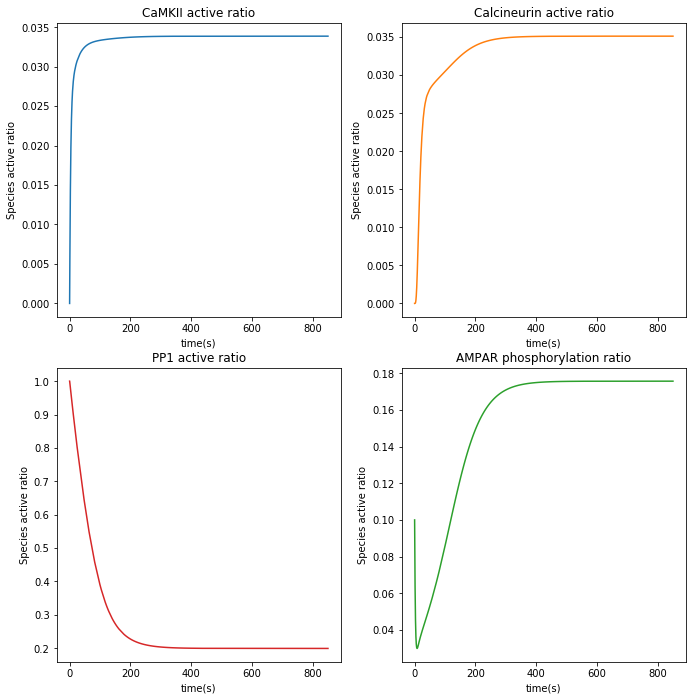

In [20]:
#FIGURE 3: Looking at equilibrium time for AMPARp_bar, CaMKIIa_bar, PP1a_bar, PP2B_bar

fig, axes = plt.subplots(2,2,figsize=(10,10))

fig.tight_layout(pad=3.0)

#plot activated CamKII ratio
axes[0, 0].plot(time, CaMKII_active_ratio)
axes[0, 0].set_title('CaMKII active ratio')

#plot activated PP2B ratio
axes[0, 1].plot(time, PP2B_active_ratio,'tab:orange')
axes[0, 1].set_title('Calcineurin active ratio')

#plot activated PP1 ratio
axes[1, 0].plot(time, PP1_active_bar, 'tab:red')
axes[1, 0].set_title('PP1 active ratio')

#plot AMPAR phosphorylation ratio
axes[1, 1].plot(time, AMPA_bar, 'tab:green')
axes[1, 1].set_title('AMPAR phosphorylation ratio')

for ax in axes.flat:
    ax.set(xlabel='time(s)', ylabel='Species active ratio')

print("AMPA_bar initial values = "+ str(AMPA_bar[time.shape[0]-1]))
print("CaMKII_active_ratio initial values = "+str(CaMKII_active_ratio[time.shape[0]-1]))
print("PP1_active_bar initial values = "+str(PP1_active_bar[time.shape[0]-1]))
print("PP2B_active_bar initial values = "+str(PP2B_active_ratio[time.shape[0]-1]))
    
    


In [25]:
#RUN FOR FIGURES 8 AND 9

#Find indices of change in intial kDephosphorylation of CaMKII values
kDphos_initial = df["Values[kcat_CaMKIIp_PP1a].InitialValue"]
unique_dp, indices_dp = np.unique(kDphos_initial, return_index = True)

#Compute time constants
stepsize = indices_dp[1]-1
simulation_time = time[indices_dp[1]-1]-time[0]
dt = time[1]-time[0]

print(stepsize)
print(simulation_time)
print(dt)

1600000
1600.0
0.001


In [26]:
#Run for Figure 8

#Given an array of values, it separates them by the intial value of the parameter in the scan (1D scan)
def split_values(indices, values):
    values_matrix = np.reshape(np.array(values), (indices.shape[0],indices[1]), order = "C") #creates an empty matrix to add the values of the split array   
    return values_matrix

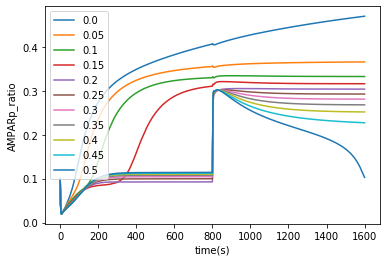

In [27]:
df_AMPAR = split_values(indices_dp, AMPA_bar)
for i in range(indices_dp.shape[0]):
    x = np.linspace(0, simulation_time, num = 1+simulation_time/dt)
    plt.plot(x, df_AMPAR[i],label=str(unique_dp[i]))

plt.xlabel('time(s)')
plt.ylabel('AMPARp_ratio')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
plt.legend()
plt.show()


In [6]:
#RUN FOR CODE OF FIGURE 9 

#Find indices of change in intial frequency values
freq_initial = df["Values[spikeFrequency].InitialValue"]
unique_f, indices_f = np.unique(freq_initial, return_index = True)


In [9]:
#Run for Figure 9

#Given an array of values, it separates them by the intial value of the parameters in the scan (2D scan)
def split_values2D(indices_f, indices_dp, values):
    values_matrix = np.reshape(np.array(values), (indices_dp.shape[0]*indices_f.shape[0],indices_dp[1]), order = "C") #creates an empty matrix to add the values of the split array   
    return values_matrix


Initial value = 0.40638
Final value = 0.412761
Percent change = 0.015702052266351615
Final value = 0.412735
Percent change = 0.015638072739800186
Final value = 0.412735
Percent change = 0.015638072739800186
Final value = 0.412735
Percent change = 0.015638072739800186
Final value = 0.412735
Percent change = 0.015638072739800186
Final value = 0.412735
Percent change = 0.015638072739800186


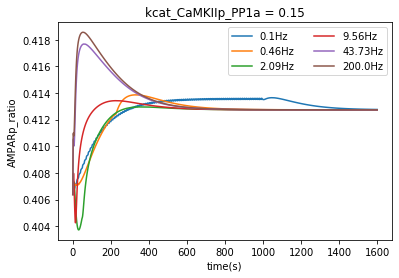

In [11]:
#Figure 9.1 (A-C): AMPAR phosphorylation for a double scan of frequency and k_dephosphorylation values

#scan where for each index of kdphos, there were n of frequency

#note: k ranges from 0 to the number of intervals of the simulation for kDphos. 
#Change k accordingly depending on the k_dephosphorylation value that you want to inspect 

df_AMPAR2D = split_values2D(indices_dp, indices_f, AMPA_bar)

kDphos_indices = np.linspace(0,indices_f.shape[0]-1, num = indices_f.shape[0]).astype(int)

k = 0
counter = 0

initial_value = df_AMPAR2D[k*indices_dp.shape[0], 0]
print("Initial value = "+ str(initial_value))

labels = np.round(unique_f, decimals =2)
for i in (kDphos_indices+(k*indices_dp.shape[0])):
    x = np.linspace(0, simulation_time, num = 2+simulation_time/dt)
    plt.plot(x, df_AMPAR2D[i],label=str(labels[counter])+"Hz")
    
    final_value = df_AMPAR2D[i, df_AMPAR2D.shape[1]-1]
    percent_change = (final_value - initial_value)/initial_value
    print("Final value = " + str(final_value))
    print("Percent change = " + str(percent_change))
    
    counter = counter+1
    
plt.title("kcat_CaMKIIp_PP1a = "+str(unique_dp[k]))
plt.xlabel('time(s)')
plt.ylabel('AMPARp_ratio')
plt.legend(loc = "upper right", ncol = 2)
plt.show()

Initial value = 0.399857
Final value = 0.407053
Percent change = 0.017996433725056656
Final value = 0.40702
Percent change = 0.017913904220758857
Final value = 0.40702
Percent change = 0.017913904220758857
Final value = 0.40702
Percent change = 0.017913904220758857
Final value = 0.40702
Percent change = 0.017913904220758857
Final value = 0.40702
Percent change = 0.017913904220758857


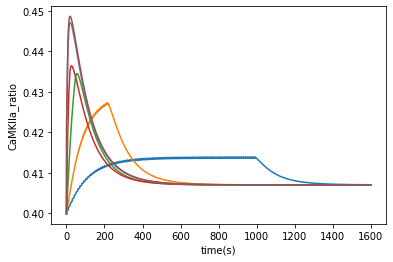

In [12]:
#Figure 9.2 (A-C): CaMKII phosphorylation ratio for a double scan of frequency and k_dephosphorylation values

df_CaMKII2D = split_values2D(indices_dp, indices_f, CaMKII_active_ratio)

kDphos_indices = np.linspace(0,indices_f.shape[0]-1, num = indices_f.shape[0]).astype(int)

k = 0
counter = 0

initial_value = df_CaMKII2D[k*indices_dp.shape[0], 0]
print("Initial value = "+ str(initial_value))
    
for i in (kDphos_indices+(k*indices_dp.shape[0])):
    x = np.linspace(0, simulation_time, num = 2+simulation_time/dt)
    plt.plot(x, df_CaMKII2D[i])#,label=str(unique_f[counter]))
    
    final_value = df_CaMKII2D[i, df_CaMKII2D.shape[1]-1]
    percent_change = (final_value - initial_value)/initial_value
    print("Final value = " + str(final_value))
    print("Percent change = " + str(percent_change))
    
    counter = counter+1

#plt.title("kcat_CaMKIIp_PP1a = "+str(unique_dp[k]))
plt.xlabel('time(s)')
plt.ylabel('CaMKIIa_ratio')
#plt.legend()
plt.show()

Initial value = 0.25608800000000004
Final value = 0.25608800000000004
Percent change = 0.0
Final value = 0.25608800000000004
Percent change = 0.0
Final value = 0.82239
Percent change = 2.2113570335197266
Final value = 0.8223889999999999
Percent change = 2.211353128612039
Final value = 0.8223889999999999
Percent change = 2.211353128612039
Final value = 0.8223889999999999
Percent change = 2.211353128612039


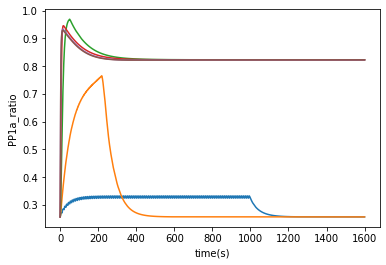

In [13]:
#Figure 9.2 (A-C): PP1 activation ratio for a double scan of frequency and k_dephosphorylation values

df_PP1a2D = split_values2D(indices_dp, indices_f, PP1_active_bar)

kDphos_indices = np.linspace(0,indices_f.shape[0]-1, num = indices_f.shape[0]).astype(int)

k = 3
counter = 0

initial_value = df_PP1a2D[k*indices_dp.shape[0], 0]
print("Initial value = "+ str(initial_value))

for i in (kDphos_indices+(k*indices_dp.shape[0])):
    x = np.linspace(0, simulation_time, num = 2+simulation_time/dt)
    plt.plot(x, df_PP1a2D[i])#,label=str(unique_f[counter]))
    
    final_value = df_PP1a2D[i, df_PP1a2D.shape[1]-1]
    percent_change = (final_value - initial_value)/initial_value
    print("Final value = " + str(final_value))
    print("Percent change = " + str(percent_change))
    
    counter = counter+1

#plt.title("kcat_CaMKIIp_PP1a = "+str(unique_dp[k]))
plt.xlabel('time(s)')
plt.ylabel('PP1a_ratio')
#plt.legend()
plt.show()